In [1]:
import numpy as np 
import scipy.stats as sp
import astropy.table as atable
from uhod import camels as CAMELS

In [2]:
import corner as DFM
import matplotlib.pyplot as plt

In [4]:
rockstar = [] 
for i in range(1000): 
    try: 
        rockstar.append(CAMELS.Rockstar(33, real='LH_%i' % i, sim='tng'))
    except FileNotFoundError: 
        print(i)
        continue
rockstar = atable.vstack(rockstar)

505


In [5]:
rockstar

scale,id,desc_scale,desc_id,num_prog,pid,upid,desc_pid,phantom,sam_Mvir,Mvir,Rvir,rs,vrms,mmp?,scale_of_last_MM,vmax,x,y,z,vx,vy,vz,Jx,Jy,Jz,Spin,Breadth_first_ID,Depth_first_ID,Tree_root_ID,Orig_halo_ID,Snap_idx,Next_coprogenitor_depthfirst_ID,Last_progenitor_depthfirst_ID,Last_mainleaf_depthfirst_ID,Tidal_Force,Tidal_ID,Rs_Klypin,Mvir_all,M200b,M200c,M500c,M2500c,Xoff,Voff,Spin_Bullock,b_to_a,c_to_a,A[x],A[y],A[z],b_to_a_500c,c_to_a_500c,A[x]_500c,A[y]_500c,A[z]_500c,T/|U|,M_pe_Behroozi,M_pe_Diemer,Type,SM,Gas,BH_Mass,Macc,Mpeak,Vacc,Vpeak,Halfmass_Scale,Acc_Rate_Inst,Acc_Rate_100Myr,Acc_Rate_1*Tdyn,Acc_Rate_2*Tdyn,Acc_Rate_Mpeak,Acc_Log_Vmax_Inst,Acc_Log_Vmax_1*Tdyn,Mpeak_Scale,Acc_Scale,First_Acc_Scale,First_Acc_Mvir,First_Acc_Vmax,Vmax\@Mpeak,Tidal_Force_Tdyn,Log_,Time_to_future_merger,Future_merger_MMP_ID
float64,int64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,float64,int64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
1.0,349562,0.0,-1,22,-1,-1,-1,0,68170000000000.0,68170000000000.0,830.507,77.115,672.45,1,0.40334,731.13,0.60887,17.40507,8.96956,-8.6,-2.06,35.03,622600000000000.0,-83610000000000.0,4487000000000.0,0.01463,0,0,349562,2364,33,-1,9650,33,0.0,-1,75.7666,68169000000000,73244000000000,58185000000000,46514000000000,25695000000000,5.89762,26.66,0.0132,0.75546,0.50369,13.3874,7.80349,12.9096,0.76361,0.50456,10.6284,6.98894,10.2913,0.5289,207490000000,36593000000000,0,598100000000,10490000000000,0,68170000000000.0,68170000000000.0,731.13,779.98,0.42316,4248.0,4248.0,3070.0,3100.0,2999.0,9.492e-13,4.963e-12,1.0,1.0,1.0,68170000000000.0,731.13,731.13,0.0,0.01011,-1.0,349562
1.0,352985,0.0,-1,8,-1,-1,-1,0,64450000000000.0,64450000000000.0,815.12,192.884,690.6,1,0.95372,632.38,16.18999,14.06059,2.31,-457.95,193.57,-34.67,-1399000000000000.0,-2434000000000000.0,6395000000000000.0,0.12124,9651,9651,352985,5787,33,-1,12496,9682,0.0,-1,141.572,64471000000000,70223000000000,54714000000000,36888000000000,9198000000000,135.763,504.71,0.1612,0.32759,0.31123,29.9261,13.2244,9.95746,0.17778,0.12754,25.1556,11.937,8.33952,0.7201,455090000000,62578000000000,0,613990000000,9127400000000,0,64450000000000.0,64450000000000.0,632.38,632.38,0.90905,13200.0,13200.0,17680.0,9146.0,10060.0,7.391e-11,6.293e-11,1.0,1.0,1.0,64450000000000.0,632.38,632.38,0.0,0.12816,-1.0,352985
1.0,353069,0.0,-1,10,352985,352985,-1,0,29090000000000.0,29090000000000.0,625.259,77.235,538.67,1,0.25008,517.03,15.93311,13.93476,2.22275,506.25,-303.37,-12.38,-169000000000000.0,-99660000000000.0,129600000000000.0,0.01693,12497,12497,353069,5871,33,-1,17057,12530,2.86863,352985,76.1457,29144000000000,31967000000000,24353000000000,17976000000000,9083400000000,33.6872,138.18,0.02044,0.83419,0.65908,13.2662,8.09621,5.27301,0.68646,0.58371,9.9984,7.39484,4.16458,0.7153,546580000000,17722000000000,0,271810000000,4977100000000,0,28860000000000.0,29090000000000.0,530.52,602.46,0.44369,1025.0,1025.0,1210.0,1576.0,1346.0,-7.121e-12,-6.487e-12,1.0,0.90905,0.90905,28860000000000.0,530.52,517.03,1.55122,-0.01321,-1.0,353069
1.0,349643,0.0,-1,3,-1,-1,-1,0,28184000000000.0,28020000000000.0,617.52,71.367,486.82,1,0.53724,516.12,6.61615,16.37883,20.98712,-29.38,-43.59,27.05,59600000000000.0,136300000000000.0,224100000000000.0,0.02707,17058,17058,349643,2445,33,-1,21340,17091,0.0,-1,71.3665,28023000000000,31227000000000,24123000000000,18505000000000,8614400000000,10.3056,12.01,0.02487,0.81887,0.65176,3.61907,11.2007,8.0315,0.76378,0.57313,3.54714,8.69943,6.62119,0.5224,158570000000,1703

In [6]:
rockstar.columns

<TableColumns names=('scale','id','desc_scale','desc_id','num_prog','pid','upid','desc_pid','phantom','sam_Mvir','Mvir','Rvir','rs','vrms','mmp?','scale_of_last_MM','vmax','x','y','z','vx','vy','vz','Jx','Jy','Jz','Spin','Breadth_first_ID','Depth_first_ID','Tree_root_ID','Orig_halo_ID','Snap_idx','Next_coprogenitor_depthfirst_ID','Last_progenitor_depthfirst_ID','Last_mainleaf_depthfirst_ID','Tidal_Force','Tidal_ID','Rs_Klypin','Mvir_all','M200b','M200c','M500c','M2500c','Xoff','Voff','Spin_Bullock','b_to_a','c_to_a','A[x]','A[y]','A[z]','b_to_a_500c','c_to_a_500c','A[x]_500c','A[y]_500c','A[z]_500c','T/|U|','M_pe_Behroozi','M_pe_Diemer','Type','SM','Gas','BH_Mass','Macc','Mpeak','Vacc','Vpeak','Halfmass_Scale','Acc_Rate_Inst','Acc_Rate_100Myr','Acc_Rate_1*Tdyn','Acc_Rate_2*Tdyn','Acc_Rate_Mpeak','Acc_Log_Vmax_Inst','Acc_Log_Vmax_1*Tdyn','Mpeak_Scale','Acc_Scale','First_Acc_Scale','First_Acc_Mvir','First_Acc_Vmax','Vmax\@Mpeak','Tidal_Force_Tdyn','Log_','Time_to_future_merger','Future_m

```
#Scale: Scale factor of halo.
#ID: ID of halo (unique across entire simulation).
#Desc_Scale: Scale of descendant halo, if applicable.
#Descid: ID of descendant halo, if applicable.
#Num_prog: Number of progenitors.
#Pid: ID of least massive host halo (-1 if distinct halo).
#Upid: ID of most massive host halo (different from Pid when the halo is within two or more larger halos).
#Desc_pid: Pid of descendant halo (if applicable).
#Phantom: Nonzero for halos interpolated across timesteps.
#SAM_Mvir: Halo mass, smoothed across accretion history; always greater than sum of halo masses of contributing progenitors (Msun/h).  Only for use with select semi-analytical models.
#Mvir: Halo mass (Msun/h).
#Rvir: Halo radius (kpc/h comoving).
#Rs: Scale radius (kpc/h comoving).
#Vrms: Velocity dispersion (km/s physical).
#mmp?: whether the halo is the most massive progenitor or not.
#scale_of_last_MM: scale factor of the last major merger (Mass ratio > 0.3).
#Vmax: Maxmimum circular velocity (km/s physical).
#X/Y/Z: Halo position (Mpc/h comoving).
#VX/VY/VZ: Halo velocity (km/s physical, peculiar).
#JX/JY/JZ: Halo angular momenta ((Msun/h) * (Mpc/h) * km/s (physical)).
#Spin: Halo spin parameter.
#Breadth_first_ID: breadth-first ordering of halos within a tree.
#Depth_first_ID: depth-first ordering of halos within a tree.
#Tree_root_ID: ID of the halo at the last timestep in the tree.
#Orig_halo_ID: Original halo ID from halo finder.
#Snap_idx: Index of snapshot (in original snapshot list) from which halo originated.
#Next_coprogenitor_depthfirst_ID: Depthfirst ID of next coprogenitor.
#Last_progenitor_depthfirst_ID: Depthfirst ID of last progenitor.
#Last_mainleaf_depthfirst_ID: Depthfirst ID of last progenitor on main progenitor branch.
#Tidal_Force: Strongest tidal force from any nearby halo, in dimensionless units (Rhalo / Rhill).
#Tidal_ID: ID of halo exerting strongest tidal force.
#Rs_Klypin: Scale radius determined using Vmax and Mvir (see Rockstar paper)
#Mvir_all: Mass enclosed within the specified overdensity, including unbound particles (Msun/h)
#M200b--M2500c: Mass enclosed within specified overdensities (Msun/h)
#Xoff: Offset of density peak from average particle position (kpc/h comoving)
#Voff: Offset of density peak from average particle velocity (km/s physical)
#Spin_Bullock: Bullock spin parameter (J/(sqrt(2)*GMVR))
#b_to_a, c_to_a: Ratio of second and third largest shape ellipsoid axes (B and C) to largest shape ellipsoid axis (A) (dimensionless).
#  Shapes are determined by the method in Allgood et al. (2006).
#  (500c) indicates that only particles within R500c are considered.
#A[x],A[y],A[z]: Largest shape ellipsoid axis (kpc/h comoving)
#T/|U|: ratio of kinetic to potential energies
#M_pe_*: Pseudo-evolution corrected masses (very experimental)
#Consistent Trees Version 1.01
#Macc,Vacc: Mass and Vmax at accretion.
#Mpeak,Vpeak: Peak mass and Vmax over mass accretion history.
#Halfmass_Scale: Scale factor at which the MMP reaches 0.5*Mpeak.
#Acc_Rate_*: Halo mass (or log10 vmax) accretion rates in Msun/h/yr (or dex/yr).
#            Inst: instantaneous; 100Myr: averaged over past 100Myr,
#            X*Tdyn: averaged over past X*virial dynamical time.
#            Mpeak: Growth Rate of Mpeak, averaged from current z to z+0.5
#            Log_Vmax: Growth Rate of Log10(Vmax)
#Mpeak_Scale: Scale at which Mpeak was reached.
#Acc_Scale: Scale at which satellites were (last) accreted.
#First_Acc_Scale: Scale at which current and former satellites first passed through a larger halo.
#First_Acc_(Mvir|Vmax): Mvir and Vmax at First_Acc_Scale.
#Vmax@Mpeak: Halo Vmax at the scale at which Mpeak was reached.
#Tidal_Force_Tdyn: Dimensionless tidal force averaged over past dynamical time.
#Log_(Vmax/Vmax_max(Tdyn;TMpeak)): Log10 of Vmax_now over Vmax@(Tdyn ago) OR Vmax@Mpeak (if and only if Mpeak happened > 1Tdyn ago).
#Time_to_future_merger: Time (in Gyr) until the given halo merges into a larger halo.  (-1 if no future merger happens)
#Future_merger_MMP_ID: most-massive progenitor of the halo into which the given halo merges. (-1 if the main progenitor of the future merger halo does not exist at the given scale factor.)
```

In [7]:
rockstar['logMvir'] = np.log10(rockstar['Mvir'])
rockstar['M_star'] = rockstar['SM']
rockstar['logMstar'] = np.log10(rockstar['M_star'])
rockstar['concentration'] = rockstar['Rvir'] / rockstar['rs']

rockstar['logVmax'] = np.log10(rockstar['vmax'])
rockstar['logVacc'] = np.log10(rockstar['Vacc'])
rockstar['logVpeak'] = np.log10(rockstar['Vpeak'])

/home/chhahn/.conda/envs/uhod/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
rockstar['logMacc'] = np.log10(rockstar['Macc'])
rockstar['logMpeak'] = np.log10(rockstar['Mpeak'])

In [9]:
# calculate number of subhalos in halo
satellites = (rockstar['upid'] != -1) & (rockstar['M_star'] > 0)
upid, n_upid = np.unique(rockstar[satellites]['upid'], return_counts=True)

_tab = atable.Table()
_tab['id'] = upid
_tab['numSubStruct'] = n_upid

rockstar = atable.join(rockstar, _tab, keys='id', join_type='left')
rockstar['numSubStruct'][rockstar['numSubStruct'].mask] = 0

In [10]:
# calculate number of subhalos in halo
satellites_logmcut = (rockstar['upid'] != -1) & (rockstar['M_star'] > 1e9)
upid, n_upid = np.unique(rockstar[satellites_logmcut]['upid'], return_counts=True)

_tab = atable.Table()
_tab['id'] = upid
_tab['numSubStruct_Mstar1e9'] = n_upid

rockstar = atable.join(rockstar, _tab, keys='id', join_type='left')
rockstar['numSubStruct_Mstar1e9'][rockstar['numSubStruct_Mstar1e9'].mask] = 0

In [11]:
is_halo = (rockstar['pid'] == -1) # halo not a subhalo 
halos = rockstar[is_halo]

In [12]:
has_galaxy = (halos['M_star'] > 0)

# halos with central galaxies
ncen_h = np.zeros(len(halos))
ncen_h[has_galaxy] = 1.

has_massive_galaxy = (halos['M_star'] > 1e9)
ncen_logmcut_h = np.zeros(len(halos))
ncen_logmcut_h[has_massive_galaxy] = 1.

nsat_h = halos['numSubStruct']
nsat_logmcut_h = halos['numSubStruct_Mstar1e9']

In [13]:
ncen_mh, mh_edges, _ = sp.binned_statistic(halos['logMvir'], ncen_h, bins=30, range=(8., 14))
ncen_mh_logmcut, _, _ = sp.binned_statistic(halos['logMvir'], ncen_logmcut_h, bins=30, range=(8., 14))
nsat_mh, mh_edges, _ = sp.binned_statistic(halos['logMvir'], nsat_h, bins=30, range=(8., 14))
nsat_mh_logmcut, _, _ = sp.binned_statistic(halos['logMvir'], nsat_logmcut_h, bins=30, range=(8., 14))

(0.0, 5.0)

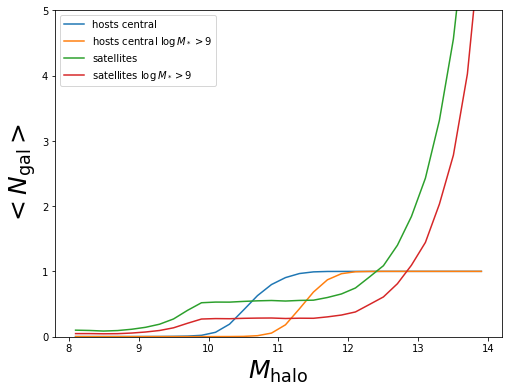

In [18]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
sub.plot(0.5*(mh_edges[:-1] + mh_edges[1:]), ncen_mh, label='hosts central')
sub.plot(0.5*(mh_edges[:-1] + mh_edges[1:]), ncen_mh_logmcut, label=r'hosts central $\log M_* > 9$')
sub.plot(0.5*(mh_edges[:-1] + mh_edges[1:]), nsat_mh, label='satellites')
sub.plot(0.5*(mh_edges[:-1] + mh_edges[1:]), nsat_mh_logmcut, label='satellites $\log M_* > 9$')


sub.legend(loc='upper left', fontsize=10)
sub.set_xlabel(r'$M_{\rm halo}$', fontsize=25)
sub.set_ylabel(r'$<N_{\rm gal}>$', fontsize=25)
sub.set_ylim(0., 5)

In [15]:
prop_internal = ['logMvir', 'logVmax', 'Spin', 'concentration', 'b_to_a', 'c_to_a']
prop_assembly = ['logMacc', 'logVacc', 'logMpeak', 'logVpeak', 'Acc_Rate_Inst', 'Acc_Rate_1*Tdyn', 'Tidal_Force_Tdyn']

In [16]:
halo_props = np.vstack([halos[prop].data for prop in prop_internal + prop_assembly]).T

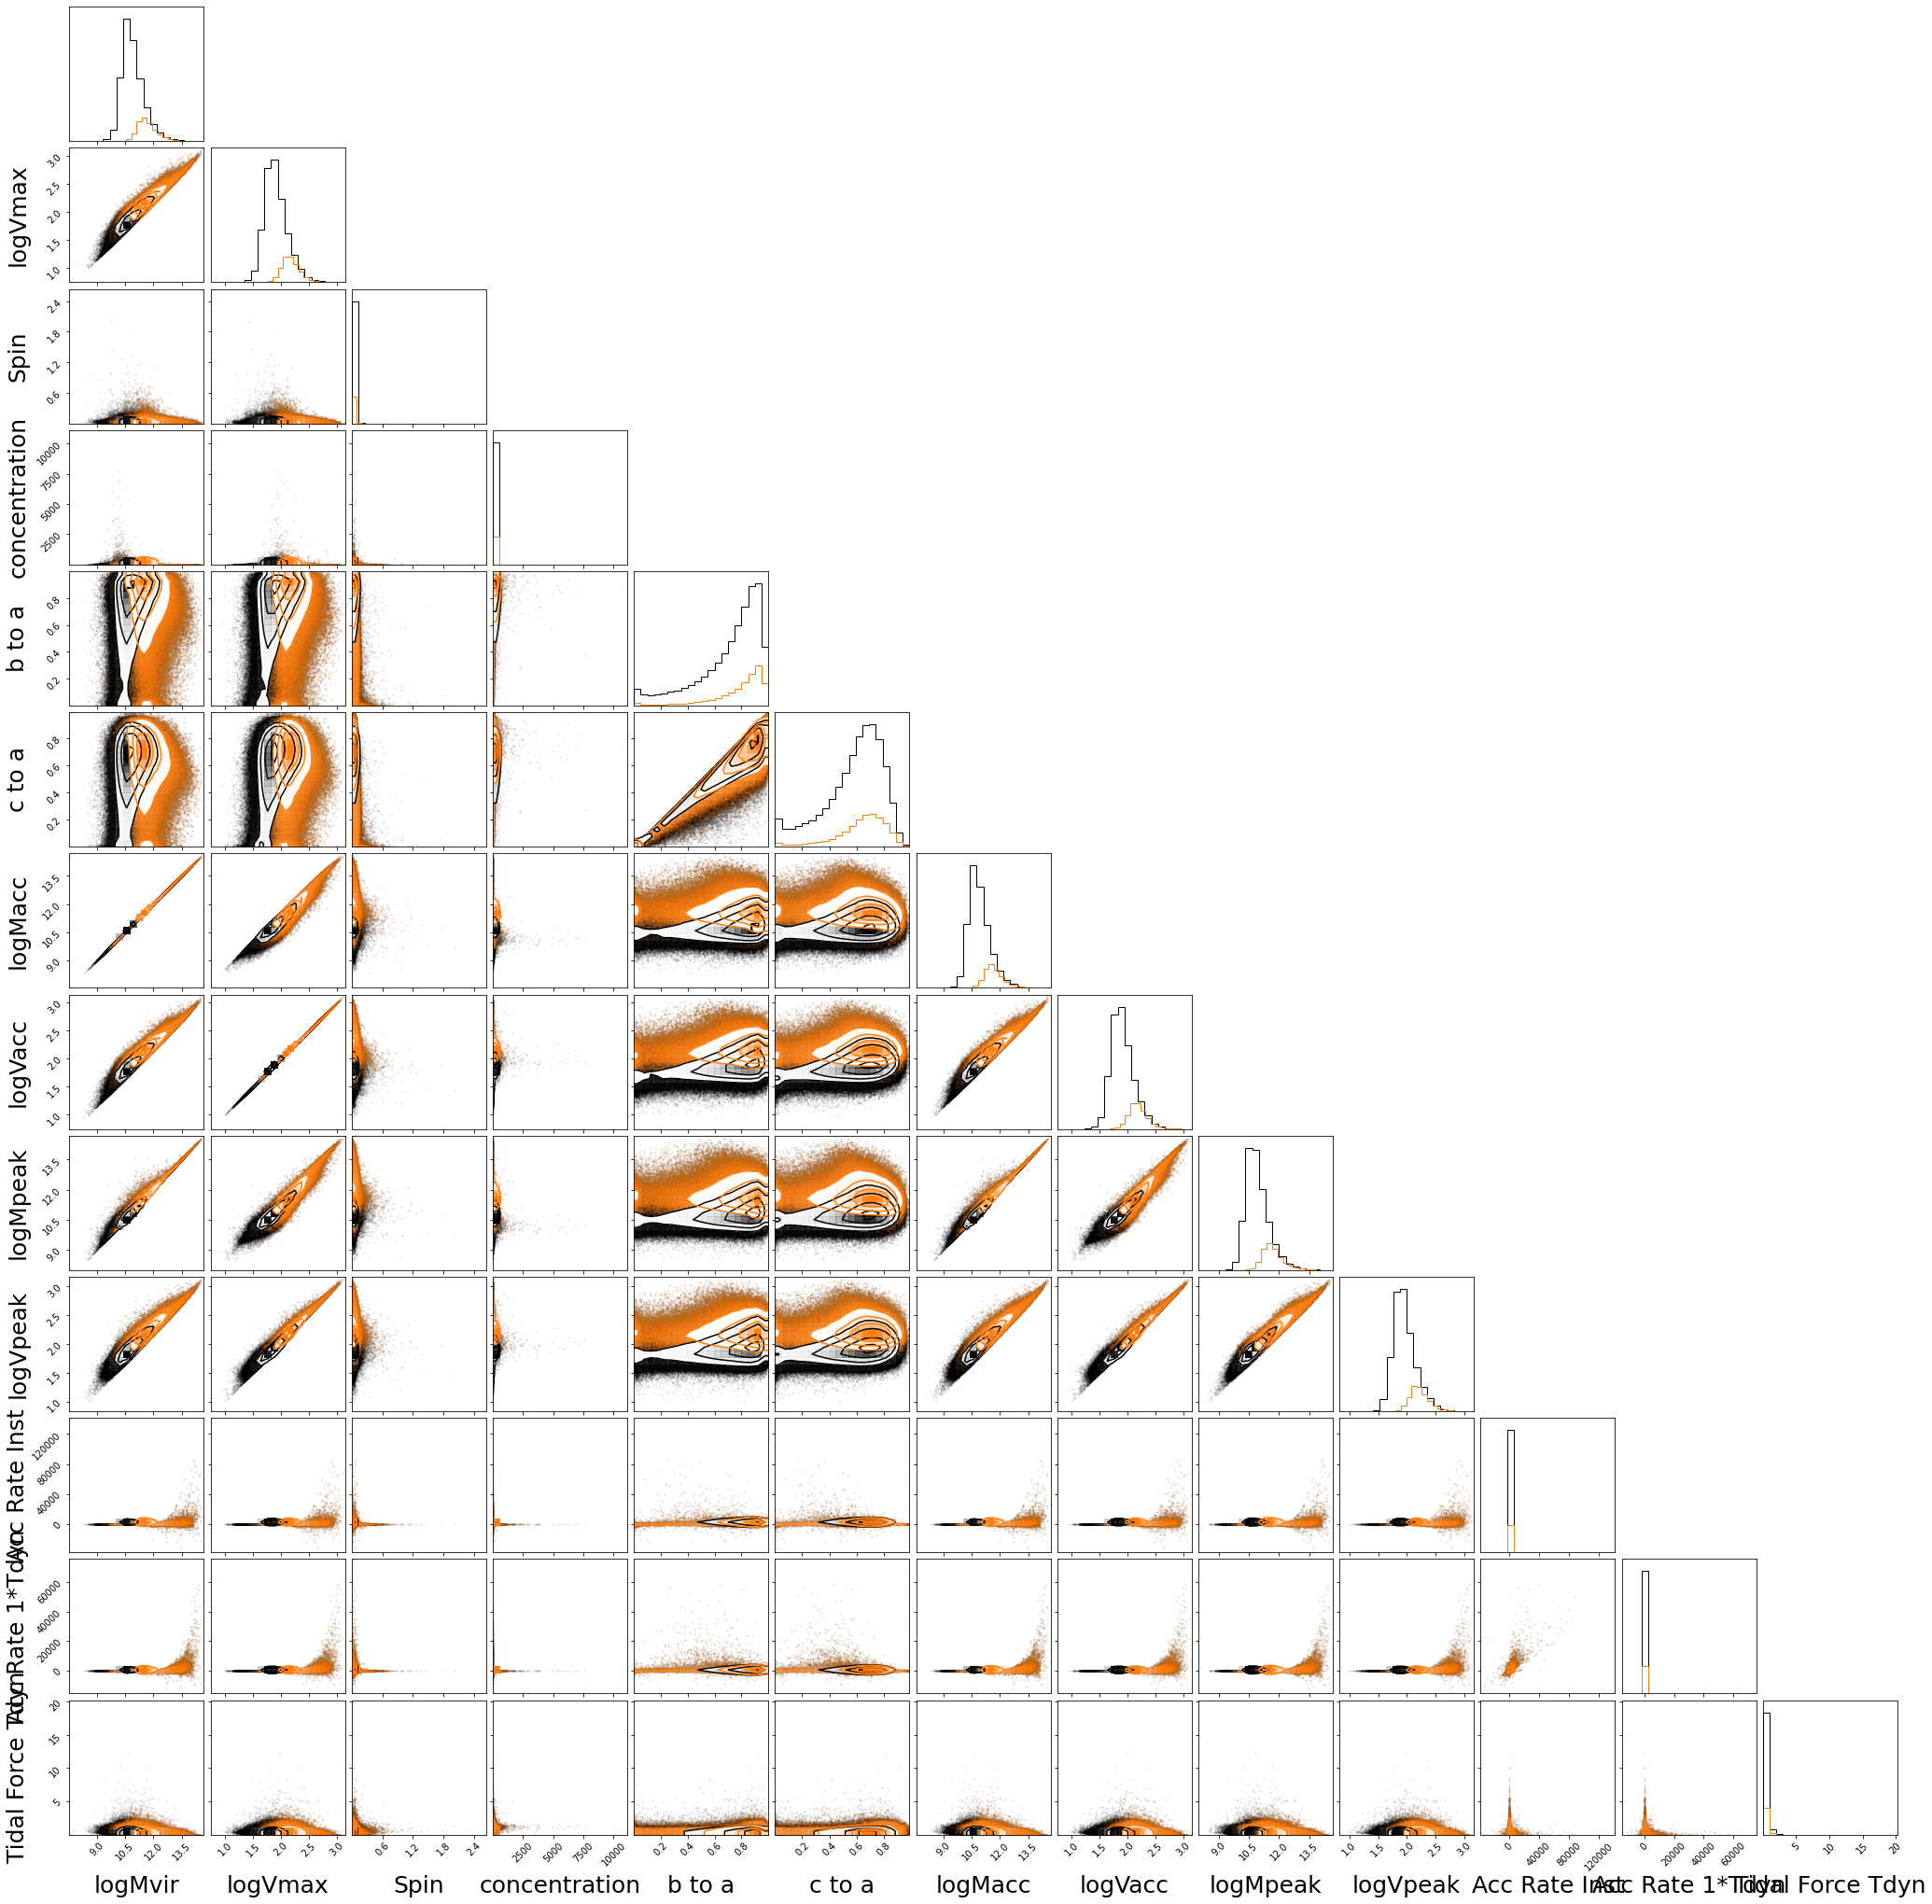

In [17]:
fig = DFM.corner(halo_props[ncen_h.astype(bool)])
_ = DFM.corner(halo_props[ncen_logmcut_h.astype(bool)], color='C1', fig=fig, 
               labels=[prop.replace("_", " ") for prop in prop_internal + prop_assembly], 
               label_kwargs={'fontsize': 25}
              )
                #labels=[r'$\log M_h$', r'$V_{\rm max}$', r'Spin', r'Tidal Force', r'Acc $\log V_{\rm max}$', r'concentration'],
                #label_kwargs={'fontsize': 25})